# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('/Users/juliagrebeneva/Downloads/Яндекс учеба/5 спринт. Исследовательский анализ данных/проект/real_estate_data.csv', sep= '\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

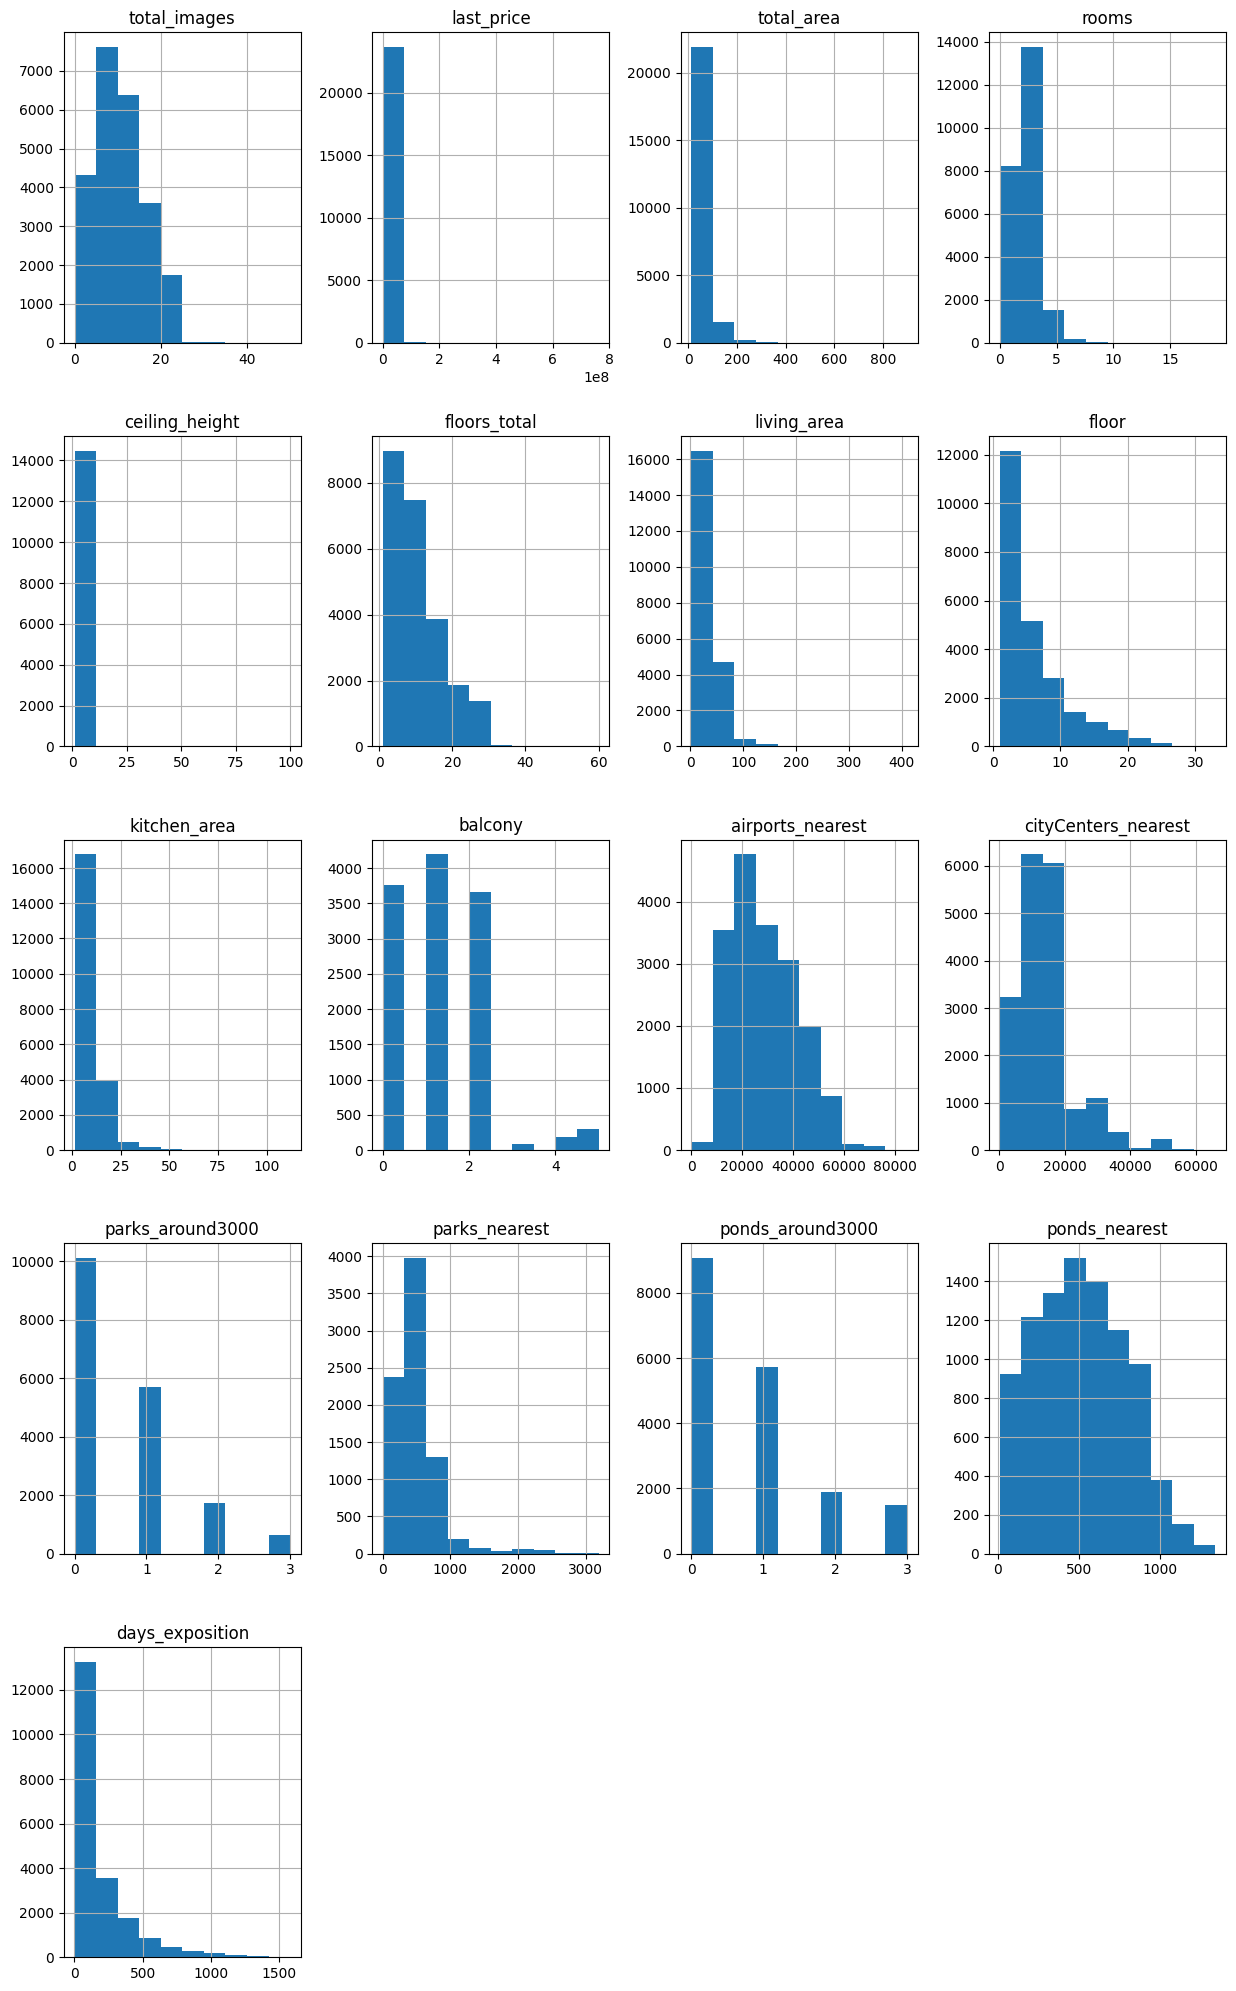

In [4]:
data.hist(figsize=(15, 25));

Датасет состоит из 23699 срок и 22 колонок. Пропуски есть в столбцах: ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony,locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000,ponds_nearest,days_exposition. 

### Предобработка данных

#### Пропуски в данных 

##### Столбец ceiling_height

In [5]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Пропущенных значений много (30%).Заменять не будем. Возможно высота потолков не влиеят на покупку квартир, поэтому ее не указывали. Проверим далее.

##### Столбец floors_total

In [6]:
data['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Пропущенных значений мало (0,5%). Причина пропусков:человеческий фактор. Так заменить пропуски, чтобы логически объяснить замену и чтобы эта замена не повляла на анализ, мы не можем. Поэтому оставим этот столбец. 

##### Столбец living_area

In [7]:
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Пропуски в значениях для столбца living_area составляет 8% от всей выборке. Можно заменить пропуски медианным значением жилой площади в зависимости от количества комнат.И заменить пропуски медианным значением.

In [8]:
# создаем новый столбик, в котром для каждой строки считается доля жилой площади от общей
data['calculator']= (data['living_area'])/data['total_area']
# считаем среднюю долю жилой площади от общей для каждого вида "комнатности", то есть читаем долю для однокомнотной квартиры и так далее.
for t in data['rooms'].unique():
    print(t, data.query('rooms == @t')['calculator'].median())

3 0.6316666666666666
1 0.48248798959576933
2 0.5850091407678245
4 0.6597402597402597
5 0.6518423782149324
6 0.6794117647058824
0 0.689655172413793
7 0.6816702819956616
11 0.7100928114264657
8 0.6884754302364403
14 0.6486946594192649
10 0.6531034482758621
15 0.6932203389830508
9 0.6282513005202081
19 0.7060864922584089
16 0.6666666666666666
12 0.4552222222222222


Этот столбец необходим для проверки. В третьей строке нет жилой площади. Общая площадь = 159.0, три комнаты, средняя доля жилой площади от общей для такой "комнатности"=0.6317. Значит жилая площадь должна равняться = 100. 44. После всех преобразований, проверим это.

In [9]:
# цикл, проставляет в пропущенные значения столбца calculator медианные значения из столба выше.
for t in data['rooms'].unique():
    data.loc[(data['rooms'] == t) & (data['calculator'].isna()), 'calculator'] = \
    data.loc[(data['rooms'] == t), 'calculator'].median()   

In [10]:
#заменяем пропуски в living_area на проиведение общей площади и доли.
data['living_area']=data['living_area'].fillna(data['total_area']*data['calculator'])

In [11]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,calculator
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000,8,NaN,...,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.472222
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.600,1,NaN,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.460396
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.300,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.612500
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,100.435,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,0.631667
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.000,13,NaN,...,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.320000


Смотрим на строку 3. Жилая площадь стала 100.44, значит мы все сделали верно.

In [12]:
data['living_area'].describe()

count    23699.000000
mean        34.693060
std         22.836079
min          2.000000
25%         18.700000
50%         30.000000
75%         42.400000
max        430.133948
Name: living_area, dtype: float64

##### Столбец kitchen_area

In [13]:
data['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Заменяем пропуски медианным значением. 

In [14]:
# перезаписываем стобец уже для доли площади кухни от общей площади
data['calculator']= (data['kitchen_area'])/data['total_area']

In [15]:
# заполним пропуски произведением медиального значением доли на общую площадь 
data['kitchen_area']=data['kitchen_area'].fillna(data['total_area']*data['calculator'].median())

In [16]:
data['kitchen_area'].describe()

count    23699.000000
mean        10.491431
std          6.029020
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

##### Столбец balcony

In [17]:
data['balcony'].describe()

count    12180.000000
mean         1.150082
std          1.071300
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

Процент пропусков очень велик (50%).Заменим все пропуски на 0. Если не указано количество балконов, мы предполагаем, что их нет.

In [18]:
data['balcony']=data['balcony'].fillna(0)

In [19]:
data['balcony'].describe()

count    23699.000000
mean         0.591080
std          0.959298
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

##### Столбец is_apartment

In [20]:
data['is_apartment'].describe()

count      2775
unique        2
top       False
freq       2725
Name: is_apartment, dtype: object

In [21]:
data['is_apartment']=data['is_apartment'].fillna(False)
data['is_apartment'].describe()

count     23699
unique        2
top       False
freq      23649
Name: is_apartment, dtype: object

Процент пропусков высокий (90%). Но мы не можем узнать, что является апартаментами, а что нет. Поэтому оставим этот столбец без изменений.

##### Столбец locality_name

In [22]:
data['locality_name'].describe()

count               23650
unique                364
top       Санкт-Петербург
freq                15721
Name: locality_name, dtype: object

Процент пропусков маленький (0.5%). У нас нет данных, чтобы воставновить данные этого столбца. Оставляем его так.

##### Столбцы airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000 ,ponds_nearest 

Все эти столбцы имеют разный процент пропусков. Эти пропуска мы никак не можем заполнить, так как мы не имеем данных о локациях этих квартир. 

##### Столбцы days_exposition 

In [23]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Процент пропусков - 13%. У нас нет данных, чтобы воставновить данные этого столбца. Оставляем его так. Будем иметь ввиду, что пропуски встречаются.

#### Типы данных

Заменим тип данных только для столбца first_day_exposition с object на datetime, чтобы далее было удобно работать с этим столбцом (выделять конкретные дни недели, месяца и тд). Остальные столбцы оставим как есть.

In [24]:
data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

#### Дубликаты

In [25]:
# проверяем полные дубликаты
data.duplicated().sum()

0

In [26]:
# проверяем неявные дубликаты в столбце locality_name
print ('Уникальных значений ',len(data['locality_name'].unique()))
print (data['locality_name'].unique())

Уникальных значений  365
['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновы

In [27]:
#заменим в слове посёлок букву "е" на "ё"
data['locality_name']=data['locality_name'].str.replace('поселок', 'посёлок')
#заменим городской посёлок, на посёлок городского типа
data['locality_name']=data['locality_name'].str.replace('городской посёлок', 'посёлок городского типа')
# счситаем количество уникальных значений
print ('Уникальных значений',len(data['locality_name'].unique()))

Уникальных значений 324


In [28]:
data['locality_name']=data['locality_name'].str.replace('садоводческое некоммерческое товарищество', 'садовое товарищество')
data['locality_name']=data['locality_name'].str.replace('посёлок при железнодорожной станции', 'посёлок станции')
print ('Уникальных значений',len(data['locality_name'].unique()))

Уникальных значений 322


#### Редкие и выбивающиеся значения.

##### Столбец ceiling_height

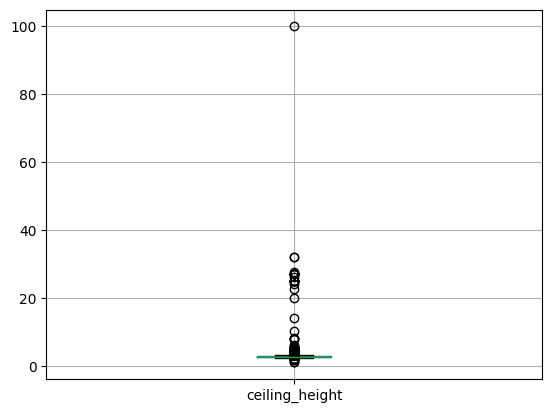

In [29]:
# Строим диаграму размаха
import matplotlib.pyplot as plt
plt.ylim()
data.boxplot('ceiling_height');

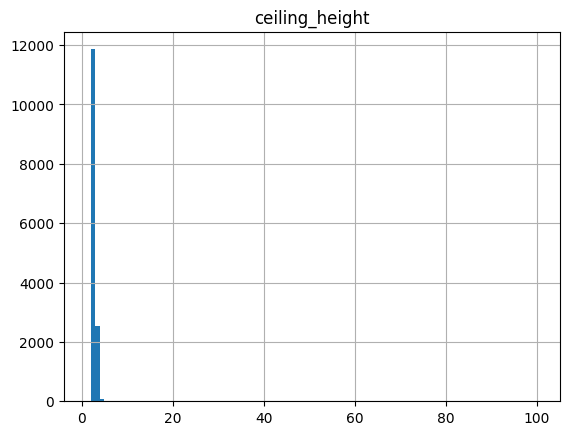

In [30]:
data.hist('ceiling_height', bins=100);

In [31]:
# Смотрим, что с характерными значениями
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

1) По данным выше видно, что есть выбивающиеся значение 100 м и значения больше 10 м. Скорее всего была допущена ошибка при записи. Вместо числа 32 м, нужно было записать 3.2 м. Исправим эти значения.

2) Нормой потолка в России считается 2.4 м, поэтому значения минимума = 1, тоже является странным. Посмотрим сколько значений меньше 2.4 метров

3) Посчитаем сколько после преобразований значений больше 6 метров.

In [32]:
# заменяем все двухзначные числа
data.loc[(data['ceiling_height']>=10),'ceiling_height'] = data['ceiling_height']/10


In [33]:
# считаем сколько строк с высотой полотков меньше 2.4 м.
print('Строк с высотой потолков меньше 2.4 метра:', len(data.query('ceiling_height < 2.4')))

Строк с высотой потолков меньше 2.4 метра: 25


Удалим эти строки из датасета.

In [34]:
data = data.loc[(data['ceiling_height'] >= 2.4) |(data['ceiling_height'].isna())].reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23674 entries, 0 to 23673
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23674 non-null  int64         
 1   last_price            23674 non-null  float64       
 2   total_area            23674 non-null  float64       
 3   first_day_exposition  23674 non-null  datetime64[ns]
 4   rooms                 23674 non-null  int64         
 5   ceiling_height        14479 non-null  float64       
 6   floors_total          23588 non-null  float64       
 7   living_area           23674 non-null  float64       
 8   floor                 23674 non-null  int64         
 9   is_apartment          23674 non-null  bool          
 10  studio                23674 non-null  bool          
 11  open_plan             23674 non-null  bool          
 12  kitchen_area          23674 non-null  float64       
 13  balcony         

In [35]:
# считаем сколько срок с высотой потолков > 5
print('Строк с высотой потолков больше 6 метров:',len(data.loc[data['ceiling_height'] > 6]))   
# удаляем их из датасета
data = data.loc[(data['ceiling_height'] <= 6) |(data['ceiling_height'].isna())].reset_index(drop=True)
# смотрим что количество строк уменьшилось на верное число
data.info()

Строк с высотой потолков больше 6 метров: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23669 entries, 0 to 23668
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23669 non-null  int64         
 1   last_price            23669 non-null  float64       
 2   total_area            23669 non-null  float64       
 3   first_day_exposition  23669 non-null  datetime64[ns]
 4   rooms                 23669 non-null  int64         
 5   ceiling_height        14474 non-null  float64       
 6   floors_total          23583 non-null  float64       
 7   living_area           23669 non-null  float64       
 8   floor                 23669 non-null  int64         
 9   is_apartment          23669 non-null  bool          
 10  studio                23669 non-null  bool          
 11  open_plan             23669 non-null  bool          
 12  kitchen_area          23669 no

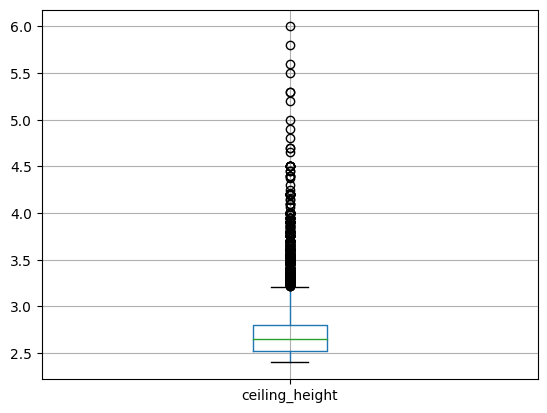

In [36]:
plt.ylim()
data.boxplot('ceiling_height'); 

In [37]:
data['ceiling_height'].describe()

count    14474.000000
mean         2.727472
std          0.277909
min          2.400000
25%          2.520000
50%          2.650000
75%          2.800000
max          6.000000
Name: ceiling_height, dtype: float64

Стандартное отклонение уменьшилось с 1.26 до 0.28, значит значения общей выборки стали меньше отличаться от среднего значения.

##### Столбец last_price

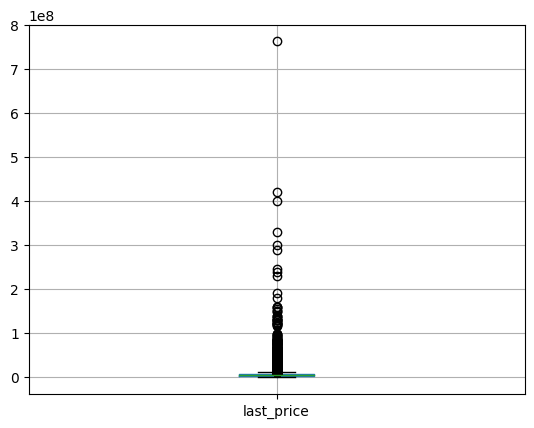

In [38]:
# Строим диаграму размаха
plt.ylim()
data.boxplot('last_price'); 

In [39]:
# Смотрим, что с характерными значениями
data['last_price'].describe()

count    2.366900e+04
mean     6.544736e+06
std      1.089299e+07
min      1.219000e+04
25%      3.420000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Если удалять все значения что больше Q3*1.5, то удалится очень большая часть датасета (10-12%). Поэтому мы удалим только числа большие 30 000 000. 

In [40]:
# считаем сколько таких значений
print(len(data.loc[data['last_price'] > 30000000])) 
# удаляем их из датасета
data = data.loc[(data['last_price'] <= 30000000) |(data['last_price'].isna())].reset_index(drop=True)
# смотрим что количество строк уменьшилось на верное число
data.info()

316
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23353 entries, 0 to 23352
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23353 non-null  int64         
 1   last_price            23353 non-null  float64       
 2   total_area            23353 non-null  float64       
 3   first_day_exposition  23353 non-null  datetime64[ns]
 4   rooms                 23353 non-null  int64         
 5   ceiling_height        14265 non-null  float64       
 6   floors_total          23268 non-null  float64       
 7   living_area           23353 non-null  float64       
 8   floor                 23353 non-null  int64         
 9   is_apartment          23353 non-null  bool          
 10  studio                23353 non-null  bool          
 11  open_plan             23353 non-null  bool          
 12  kitchen_area          23353 non-null  float64       
 13  balcony     

##### Столбец days_exposition

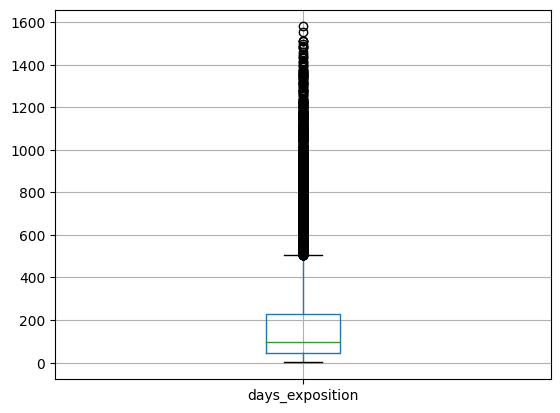

In [41]:
# Строим диаграму размаха
plt.ylim()
data.boxplot('days_exposition'); 

In [42]:
# Смотрим, что с характерными значениями
data['days_exposition'].describe()

count    20254.000000
mean       179.546707
std        218.339191
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

Максимальное число дней 1580, это больше 4 лет. Это значение является выбросом. Как и все значения больше 800. Посмотрим сколько их и удалим, если их не очень большой процент (4-6%).

In [43]:
print(len(data.loc[data['days_exposition'] > 800])) 

572


In [44]:
data = data.loc[(data['days_exposition'] <= 800) |(data['days_exposition'].isna())].reset_index(drop=True)
# смотрим что количество строк уменьшилось на верное число
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22781 entries, 0 to 22780
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22781 non-null  int64         
 1   last_price            22781 non-null  float64       
 2   total_area            22781 non-null  float64       
 3   first_day_exposition  22781 non-null  datetime64[ns]
 4   rooms                 22781 non-null  int64         
 5   ceiling_height        13891 non-null  float64       
 6   floors_total          22699 non-null  float64       
 7   living_area           22781 non-null  float64       
 8   floor                 22781 non-null  int64         
 9   is_apartment          22781 non-null  bool          
 10  studio                22781 non-null  bool          
 11  open_plan             22781 non-null  bool          
 12  kitchen_area          22781 non-null  float64       
 13  balcony         

##### Столбцы total_area, living_area, kitchen_area

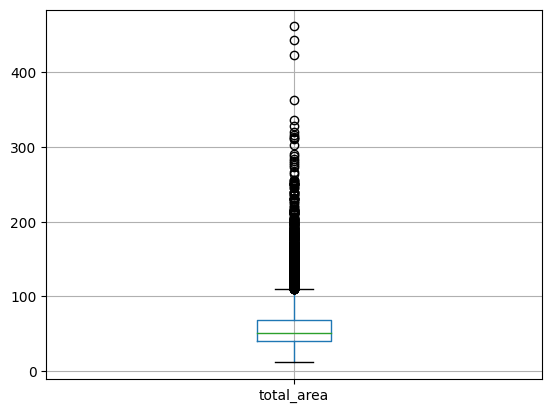

In [45]:
# Строим диаграму размаха
plt.ylim()
data.boxplot('total_area');

In [46]:
# Смотрим, что с характерными значениями
data['total_area'].describe()

count    22781.000000
mean        57.976583
std         27.901019
min         12.000000
25%         40.000000
50%         51.200000
75%         68.000000
max        460.800000
Name: total_area, dtype: float64

Выбросами здесь будет все, что больше 200. Исключим эти строки, и таким образом исключим некоторые выбросы в жилой площади и площади кухни.

In [47]:
# считаем сколько таких значений
print(len(data.loc[data['total_area'] > 180])) 
# удаляем все строки удовлетворяющие условию
data = data.loc[data['total_area'] <= 180].reset_index(drop=True)
data.info()

142
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22639 entries, 0 to 22638
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22639 non-null  int64         
 1   last_price            22639 non-null  float64       
 2   total_area            22639 non-null  float64       
 3   first_day_exposition  22639 non-null  datetime64[ns]
 4   rooms                 22639 non-null  int64         
 5   ceiling_height        13799 non-null  float64       
 6   floors_total          22557 non-null  float64       
 7   living_area           22639 non-null  float64       
 8   floor                 22639 non-null  int64         
 9   is_apartment          22639 non-null  bool          
 10  studio                22639 non-null  bool          
 11  open_plan             22639 non-null  bool          
 12  kitchen_area          22639 non-null  float64       
 13  balcony     

Теперь удалим оставшиеся выбросы в столбцах living_area и kitchen_area, но так, чтобы не удалить большую долю датафрейма.

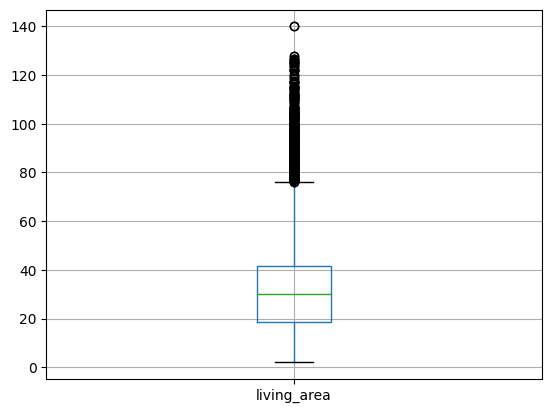

In [48]:
plt.ylim()
data.boxplot('living_area'); 

In [49]:
# выбросы будем считать, все что больше 120. Считаем количество и удаляем.
print(len(data.loc[data['living_area'] > 120])) 

23


In [50]:
data = data.loc[data['living_area'] <= 120].reset_index(drop=True)

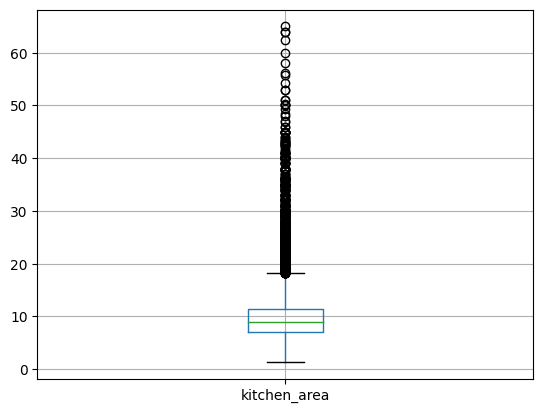

In [51]:
plt.ylim()
data.boxplot('kitchen_area');

In [52]:
# выбросы будем считать, все что больше 45. Считаем количество и удаляем.
print(len(data.loc[data['kitchen_area'] > 45])) 

24


In [53]:
data = data.loc[data['kitchen_area'] <= 45].reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22592 entries, 0 to 22591
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22592 non-null  int64         
 1   last_price            22592 non-null  float64       
 2   total_area            22592 non-null  float64       
 3   first_day_exposition  22592 non-null  datetime64[ns]
 4   rooms                 22592 non-null  int64         
 5   ceiling_height        13762 non-null  float64       
 6   floors_total          22510 non-null  float64       
 7   living_area           22592 non-null  float64       
 8   floor                 22592 non-null  int64         
 9   is_apartment          22592 non-null  bool          
 10  studio                22592 non-null  bool          
 11  open_plan             22592 non-null  bool          
 12  kitchen_area          22592 non-null  float64       
 13  balcony         

##### Столбцы airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest

Для каждого из столбов построим диаграммы размаха, проверим количество выбросов и удалим их.

AxesSubplot(0.125,0.11;0.775x0.77)


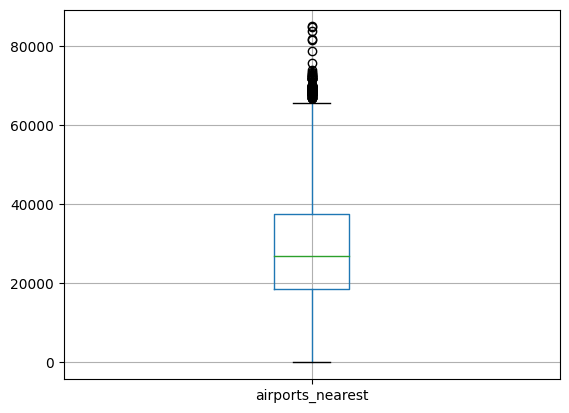

In [54]:
# Строим диаграмы размаха
plt.ylim()
print (data.boxplot('airports_nearest') );

Если считать за выборсы, все что больше в 1.5 раза верхнего 'уса', то здесь выбросов нет. 

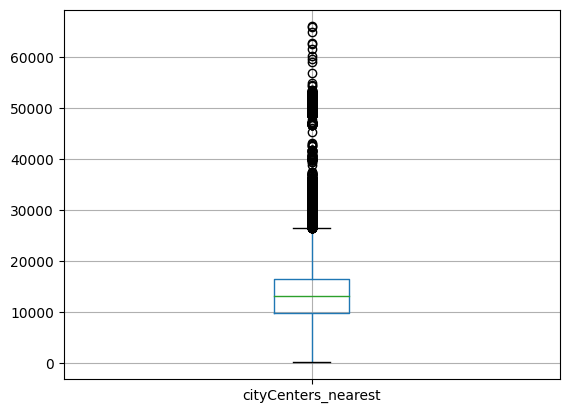

In [55]:
plt.ylim()
data.boxplot('cityCenters_nearest');

In [56]:
# для этого столбика, значения больше 40500 будут выбросами.
print(len(data.loc[data['cityCenters_nearest'] > 40500])) 
# удаляем эти значения
data = data.loc[(data['cityCenters_nearest'] <= 40500) |(data['cityCenters_nearest'].isna())].reset_index(drop=True)

282


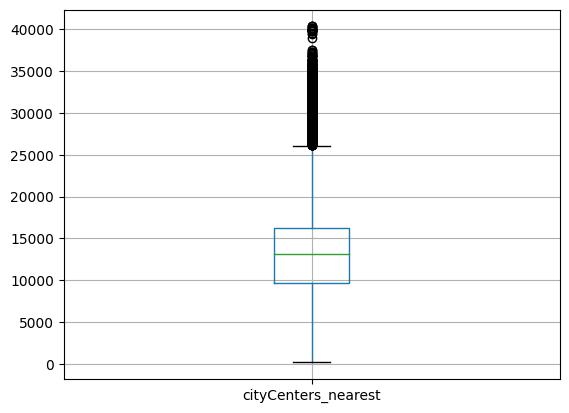

In [57]:
plt.ylim()
data.boxplot('cityCenters_nearest');

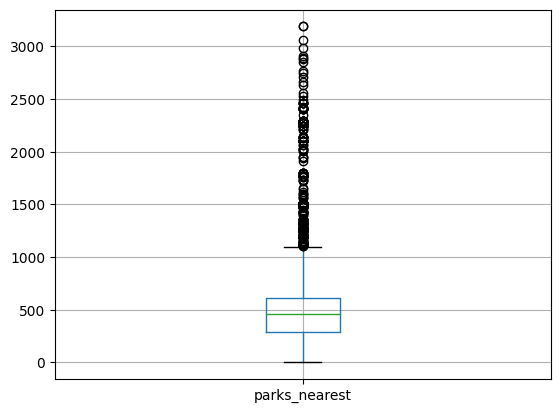

In [58]:
# строим гистограмму размаха
plt.ylim()
data.boxplot('parks_nearest');

Мы не будем удалять значения, для которых расстояния до парка меньше 3000м, так как в самом датафрайме у нас есть столбики с количеством парков в радиусе 3000 м. Тогда мы не удалим данные для столбца с количеством парков.

In [59]:
# считаем сколько строк со значением больше 3000 м.
print(len(data.loc[data['parks_nearest'] > 3000])) 
# удаляем эти значения
data = data.loc[(data['parks_nearest'] <= 3000) |(data['parks_nearest'].isna())].reset_index(drop=True)

3


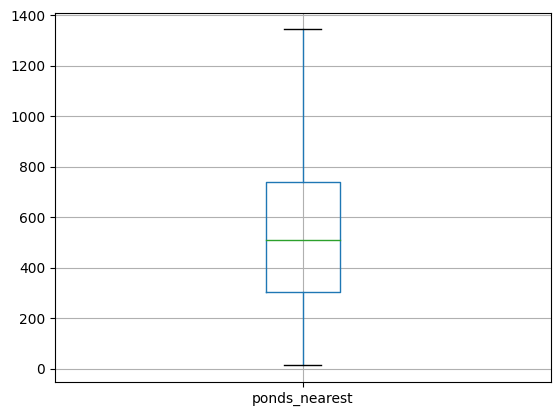

In [60]:
# строим гистограмму размаха для 'ponds_nearest'
plt.ylim()
data.boxplot('ponds_nearest'); 

Выбросов в этом столбце нет. 

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22307 entries, 0 to 22306
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22307 non-null  int64         
 1   last_price            22307 non-null  float64       
 2   total_area            22307 non-null  float64       
 3   first_day_exposition  22307 non-null  datetime64[ns]
 4   rooms                 22307 non-null  int64         
 5   ceiling_height        13569 non-null  float64       
 6   floors_total          22225 non-null  float64       
 7   living_area           22307 non-null  float64       
 8   floor                 22307 non-null  int64         
 9   is_apartment          22307 non-null  bool          
 10  studio                22307 non-null  bool          
 11  open_plan             22307 non-null  bool          
 12  kitchen_area          22307 non-null  float64       
 13  balcony         

#### Вывод

До преобразований датафрайм состоял из 23699 строк, после преобразований 22307. После предобработки данных датафрейм уменьшился на 6%.

### Посчитайте и добавьте в таблицу новые столбцы

In [62]:
# добавляем новый столбец цена одного квадратного метра 'price_for_meter'
data['price_for_meter']=data['last_price']/data['total_area']
# все значения в столбиках округляться до сотых
pd.set_option("display.precision", 2)

In [63]:
# добавляем новый столбец день недели публикации объявления day_of_the_week_publication
data['day_of_the_week_publication']=data['first_day_exposition'].dt.weekday

In [64]:
#добавляем новый столбец месяц публикации объявления month_publication
data['month_publication']=data['first_day_exposition'].dt.month

In [65]:
#добавляем новый столбец год публикации объявления year_publication
data['year_publication']=data['first_day_exposition'].dt.year

In [66]:
#добавляем новый столбец тип этажа квартиры (значения — «первый», «последний», «другой») floor_type
# пропишем фунцию, которая будет получать на вход значения этажа квартиры и этажность всего дома
def categorize_floor(row):
    floor=row['floor']
    total=row['floors_total']
    
    if floor == 1:
            return 'первый'
    elif floor == total:
            return 'последний'
    return 'другой'  

# применяем функцию к датасету и получаем новый столбик
data['floor_type'] = data.apply(categorize_floor,axis=1)
# в строках, где были пропуски, будет значение "другой"

In [67]:
#добавляем новый столбец расстояние до центра города в километрах (округляем до целых) cityCenters_nearest_km
data['cityCenters_nearest_km']=round(data['cityCenters_nearest']/1000)

In [68]:
# посмотрим что получилось
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,calculator,price_for_meter,day_of_the_week_publication,month_publication,year_publication,floor_type,cityCenters_nearest_km
0,20,1.30e+07,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,2.0,755.0,NaN,0.23,120370.37,3,3,2019,другой,16.0
1,7,3.35e+06,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,0.0,NaN,81.0,0.27,82920.79,1,12,2018,первый,19.0
2,10,5.20e+06,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,2.0,574.0,558.0,0.15,92785.71,3,8,2015,другой,14.0
3,2,1.00e+07,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,1.0,48.0,121.0,0.41,100000.00,1,6,2018,другой,8.0
4,10,2.89e+06,30.4,2018-09-10,1,NaN,12.0,14.4,5,False,...,NaN,NaN,55.0,0.30,95065.79,0,9,2018,другой,NaN


In [69]:
# Код ревьюера
data[['floor', 'floors_total', 'floor_type']].sample(10)

,floor,floors_total,floor_type
13706,1,5.0,первый
8604,2,5.0,другой
6189,10,17.0,другой
5842,6,7.0,другой
9547,5,5.0,последний
11528,8,9.0,другой
22123,9,9.0,последний
9812,1,2.0,первый
4394,5,7.0,другой
10171,3,12.0,другой


In [70]:
data[['first_day_exposition', 'day_of_the_week_publication', 'month_publication','year_publication']].sample(10)

,first_day_exposition,day_of_the_week_publication,month_publication,year_publication
5071,2018-09-25,1,9,2018
13417,2018-01-12,4,1,2018
7334,2017-03-02,3,3,2017
9686,2016-05-25,2,5,2016
10018,2019-04-11,3,4,2019
15649,2018-11-08,3,11,2018
20890,2018-01-20,5,1,2018
2142,2017-02-04,5,2,2017
1965,2019-02-21,3,2,2019
12132,2015-09-28,0,9,2015


In [71]:
data[['cityCenters_nearest', 'cityCenters_nearest_km']].sample(10)

,cityCenters_nearest,cityCenters_nearest_km
16147,NaN,NaN
18115,NaN,NaN
9536,14640.0,15.0
18029,NaN,NaN
21001,13114.0,13.0
4940,13390.0,13.0
7790,10302.0,10.0
2460,17027.0,17.0
15311,16912.0,17.0
17810,30750.0,31.0


### Проведите исследовательский анализ данных

#### Изучаем следующие параметры объектов

##### Общая площадь квартир

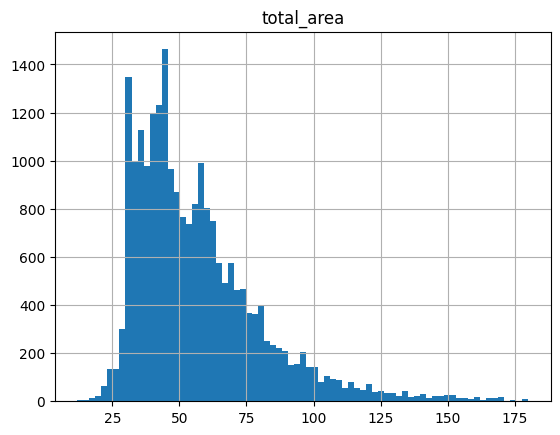

In [72]:
data.hist('total_area', bins=75);

Распеределение общей площади имеет три пика: первый при площади = 30 м, второй пик при 45 м и третий при 60 м. Это может быть связано с количеством комнат. Каждый пик соответсвует однокомнотной квартире, двух- и трехконатной квартирам. После третьего пика распределение имеет хвост до 175 м. Квартир с такой большой площадью меньше всего. Большая часть квартир имеет площадь в интервале от 30 до 45 метров. 

##### Жилая площадь квартир

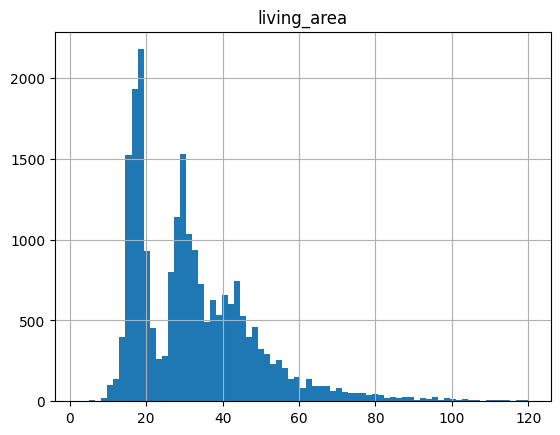

In [73]:
data.hist('living_area', bins=75);

Распределение жилой площади должно выглядеть как распределение общей площади. Если обратить внимание на этот график и предыдущей, то заметим, что график жилой площади имеет так же три основных пика, а далее идет хвост до 120 м.

##### Площадь кухни 

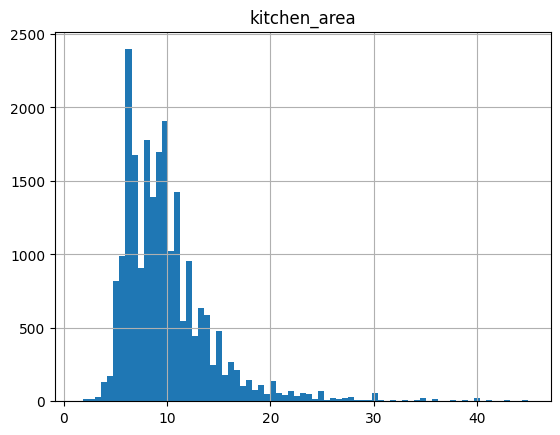

In [74]:
data.hist('kitchen_area', bins=75);

Распределение площади кухни может отличаться от площади квартиры, так как кухня может быть совмещена с гостинной, может быть очень большой по отношению к площади квартиры и т.д. Данное распределение имеет один пик при 8 метрах (соответсвует однокомнатной квартире). Большинство квартир имеет площадь между 6 и 12 метрами. Но есть и квартиры с площадью кухни более 40 м.

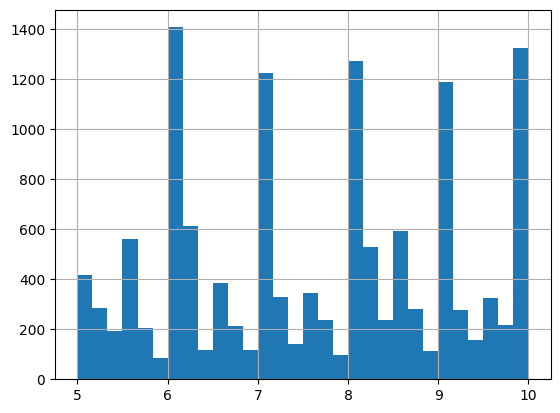

In [75]:
# Код ревьюера
data['kitchen_area'].hist(bins=30, range = (5, 10));

##### Цена объекта

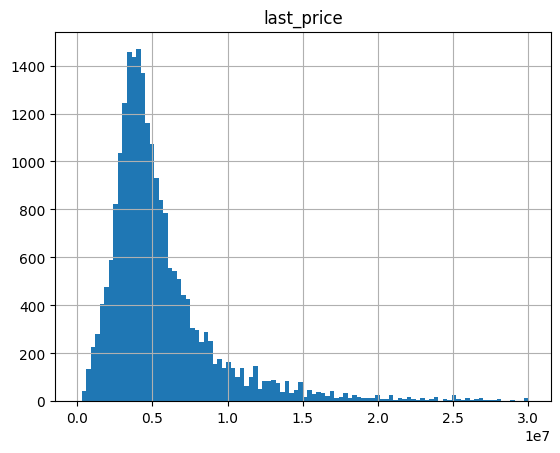

In [76]:
data.hist('last_price', bins=100);

Распределение для цены обьекта является нормальным, но есть хвост, это квартиры с большой площадью. Наибольшее количество квартир находится в интервале от 2 000 000 до 7 000 000 рублей. 

##### Количество комнат

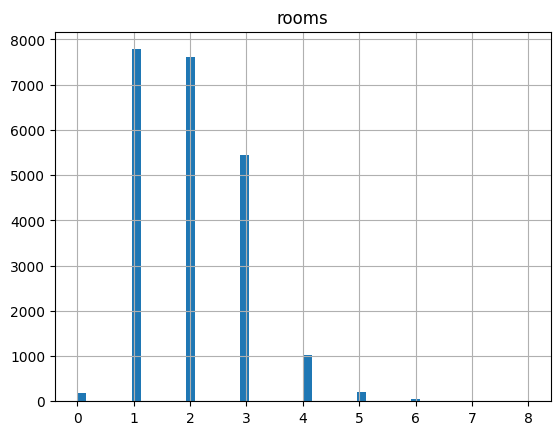

In [77]:
data.hist('rooms', bins=50);

Наибольшее количество продающихся квартир-это однокомнатные квартиры. Почти столько же предложений на двухкомнатные. Есть несколько квартир, для которых было указано ноль комнат. Это может быть связано с квартирами-студиями или просто человеческий фактор. Проверим сколько их.

In [78]:
len(data.loc[data['rooms'] == 0]) 

193

Посмотрим сколько из этих значений - студии, для остальных посмотрим чему ровняется средняя площадь и максимальная площадь.

In [79]:
print ('Студий из этого списка: ', len(data.loc[(data['rooms']==0)&(data['studio']== True)]))
print ('Средняя площадь не студий ', data.loc[(data['rooms']==0)&(data['studio']== False), 'total_area'].mean())
print ('Максимальная площадь не студий ', data.loc[(data['rooms']==0)&(data['studio']== False), 'total_area'].max())

Студий из этого списка:  135
Средняя площадь не студий  26.874655172413796
Максимальная площадь не студий  42.63


Заменим все 0 на 1. Для студий есть только одна комната. Средняя площадь "не студий" соответствует однокомнатной квартире. После еще раз выведем гистрограмму.

In [80]:
data.loc[data['rooms']==0, 'rooms']=1

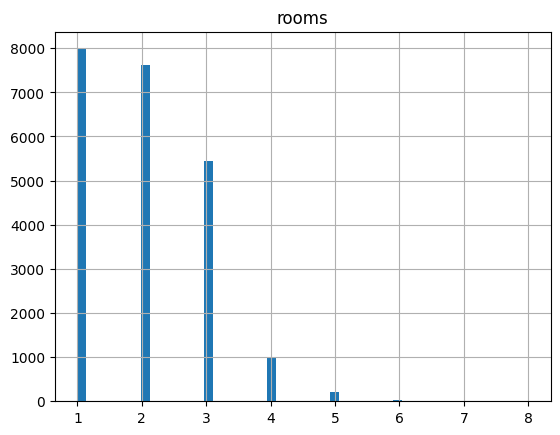

In [81]:
data.hist('rooms', bins=50);

##### Высота потолков

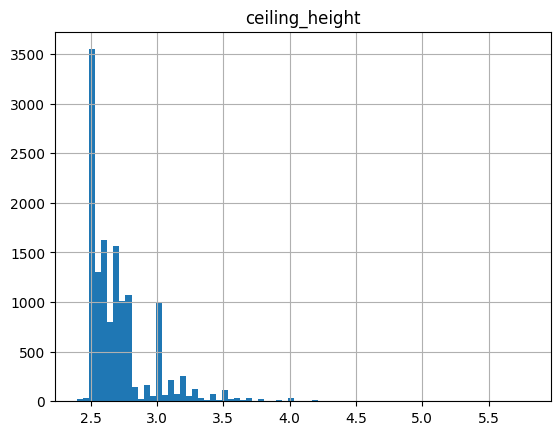

In [82]:
data.hist('ceiling_height', bins=75);

По распределению высоты потолков видим пик при 2.4-2.5 м. Это норма для высоты потолков в России. Максимальное количество предложений находится в интервале от 2.5 до 3.2 м.

##### Этаж квартиры

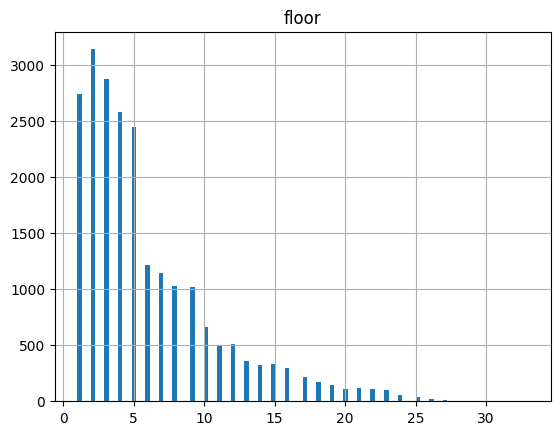

In [83]:
data.hist('floor', bins=100);

Распределение этажей выглядит нормальным, но есть хвост. Большинсвто квартир находятся от 1 до 5 этажа. Это может быть связано с тем, что в датафрейме больше всего пятиэтажных домов. 

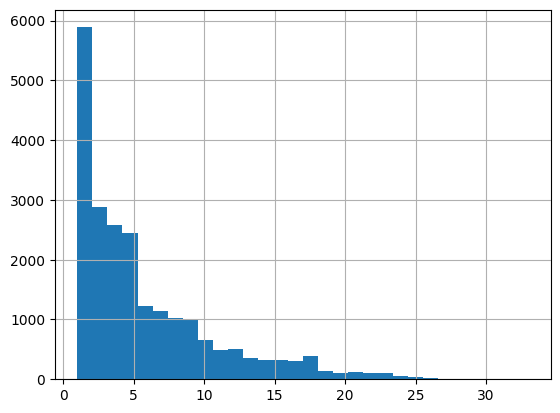

In [84]:
# Код ревьюера
data['floor'].hist(bins=30);

##### Тип этажа квартиры

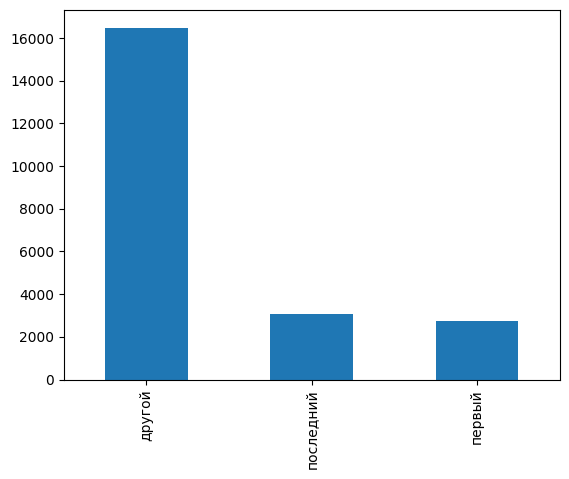

In [85]:
data['floor_type'].value_counts().plot(kind='bar');

Это очевидное распределение. Потому что в общем квартир на первом и последнем этажах меньше, чем на всех остальных.

##### Общее количество этажей в доме

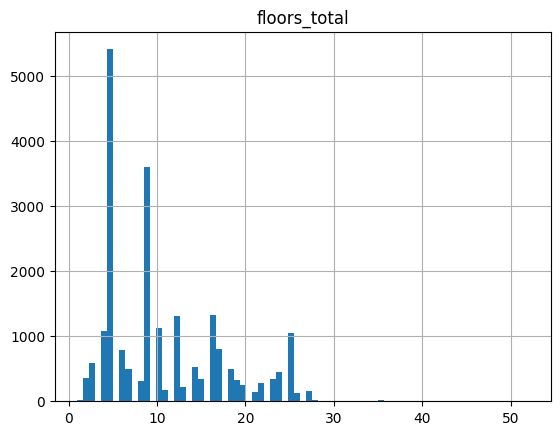

In [86]:
data.hist('floors_total', bins=75);

Данное распределение тоже кажется очевидным. Большой пик на 5 и 9 этажах. Далее есть небольшие пики на 12,16, 26 этажных зданиях. 

##### Расстояние до центра города в метрах

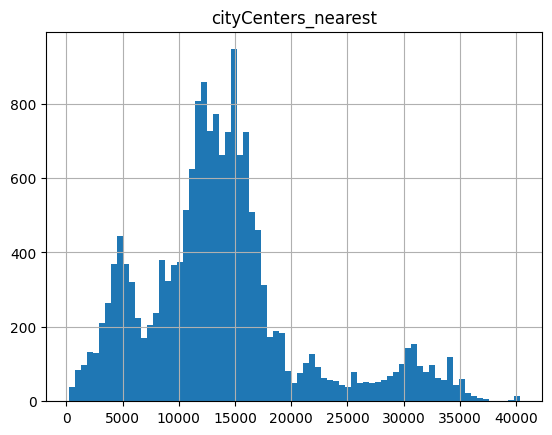

In [87]:
data.hist('cityCenters_nearest', bins=75);

Большинство значений находится в интервале от 10 до 18 км. Пик находится на 15 км от центра. 

##### Расстояние до ближайшего аэропорта

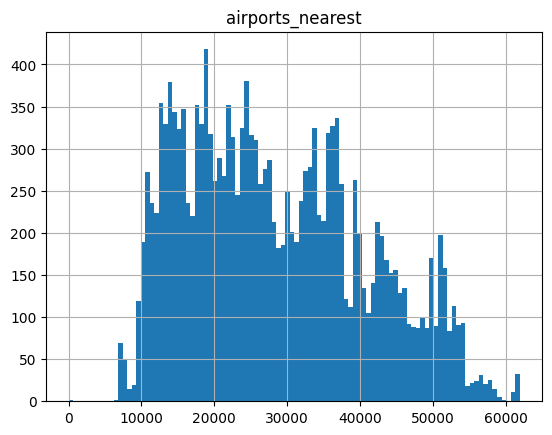

In [88]:
data.hist('airports_nearest', bins=100);

Для расстояния до ближайшего аэропорта параметр распределен в интервале от 0 до 60 км. На всем интервале есть уменьшения и увеличения количества квартир, но на интервале от 0 до 8 км квартир на продажу меньше всего.

##### Расстояние до ближайшего парка

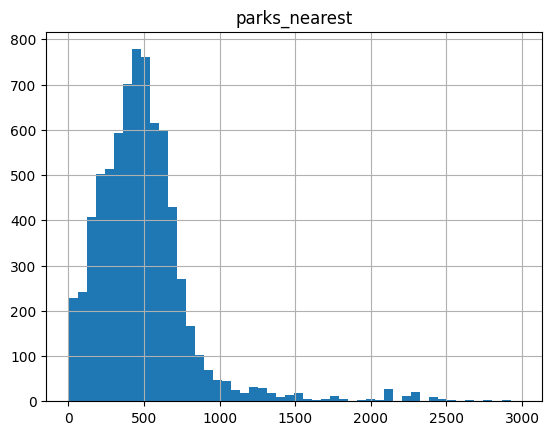

In [89]:
data.hist('parks_nearest', bins=50);

Расстояние для ближайшего парка имеет пик при 500 м. Распределение выглядит нормальным, но имеет хвос до 3000 м. Мы не удаляли его, потому что в датасете есть колонка с количеством парков в радиусе 3000 м. 

##### День и месяц публикации объявления

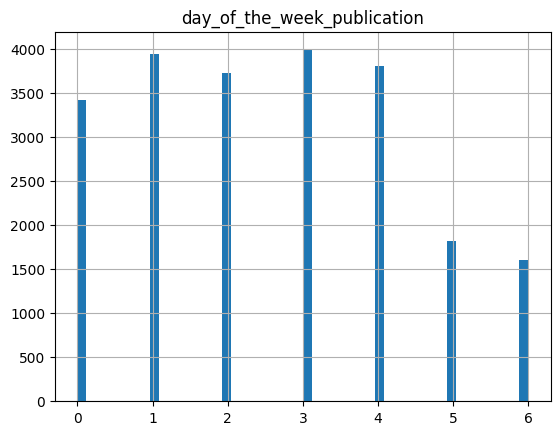

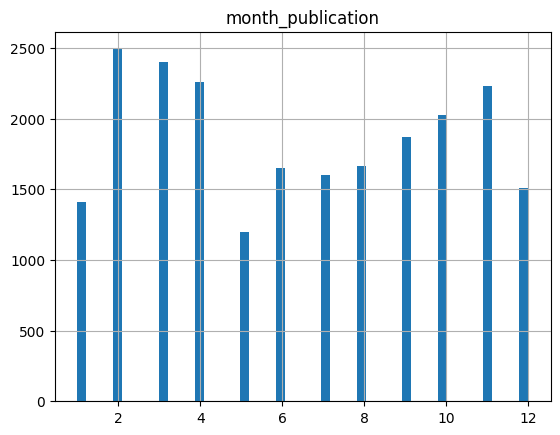

In [90]:
data.hist('day_of_the_week_publication', bins=50);
data.hist('month_publication', bins=50);

По распределению дней можно сказать, что большинство объялений публикуются в будние дни, чаще всего в четверг.
По распределению месяцев, что больше продажей квартир занимаются с февраля по апрель и с октября по ноябрь. В "праздничные" месяцы декабрь, январь, май) объявлений меньше всего.

#### Изучаем как быстро продавались квартиры

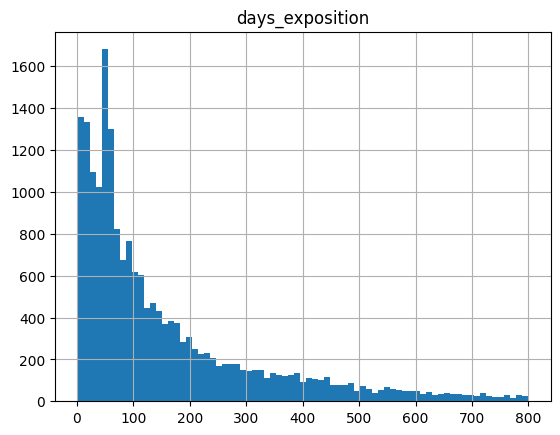

In [91]:
data.hist('days_exposition', bins=75);

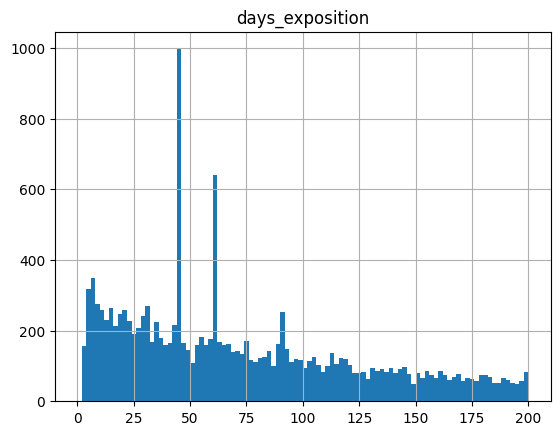

In [92]:
data.hist('days_exposition', bins=100, range=(0,200));

In [93]:
print ('Среднее', data['days_exposition'].mean())
print ('Медиана', data['days_exposition'].median())

Среднее 154.47294776119404
Медиана 90.00000000000001


По данному распределению, быстрой продажей можно назвать промежуток между 1 и 40 днями, до первого спада на графике. Есть так же экстремум в районе 2 месяц и 3х. Медиана равняется 90 дней и большинсво квартир продается в течении трех месяцев с даты публикации. После 100 дней с публикации видим спад и хвост продолжается до 800 дней (остальные строки с большими значениями мы удалили), который и повлиял на cреднее значение, которое равняется 154 дням. Значения больше 300 дней (около года) можно считать необычно долгими. Эти пики на 45, 60т и 90 дней могут означать автоматическое снятие объявлений с публикации, например при отстутсвии оплаты.

#### Изучаем факторы, которые больше всего влияют на полную стоимость объекта.

##### Общая площадь, жилая площадь и площадь кухни

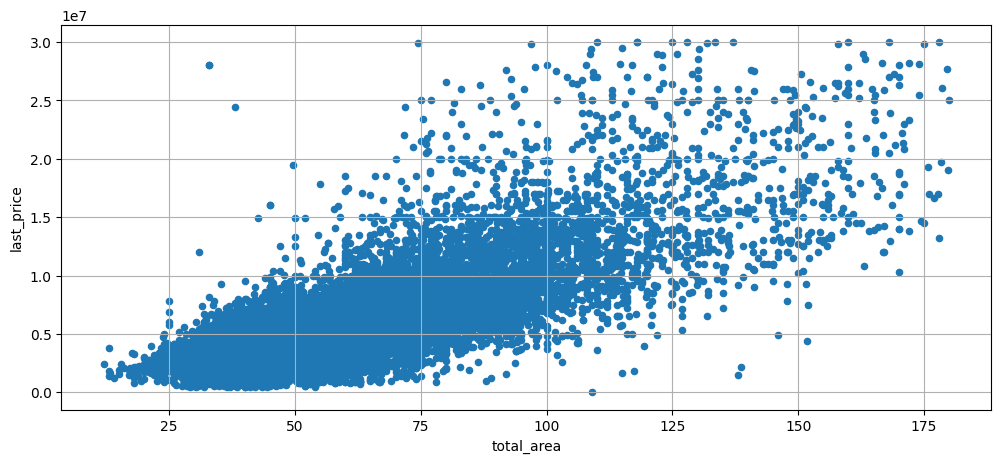

In [94]:
data.plot(kind='scatter',x ='total_area', y='last_price',grid=True,figsize=(12,5));

Для квартир общей площадью до 100 м кв видна прямая зависимость цены квартиры от площади (практически без выбросов). Квартир с большей площадью в датафрейме меньше, поэтому график "расползается" по оси У, но общая тенденция сохраняется: чем больше площадь, тем выше цена. Можно посчитать коэффициент корреляции и убедиться в выводе. 

In [95]:
data['total_area'].corr(data['last_price'])

0.7792530194514363

Коэффициент равняется 0.78 , это значит что есть практически линейная связь между площадью и ценой.

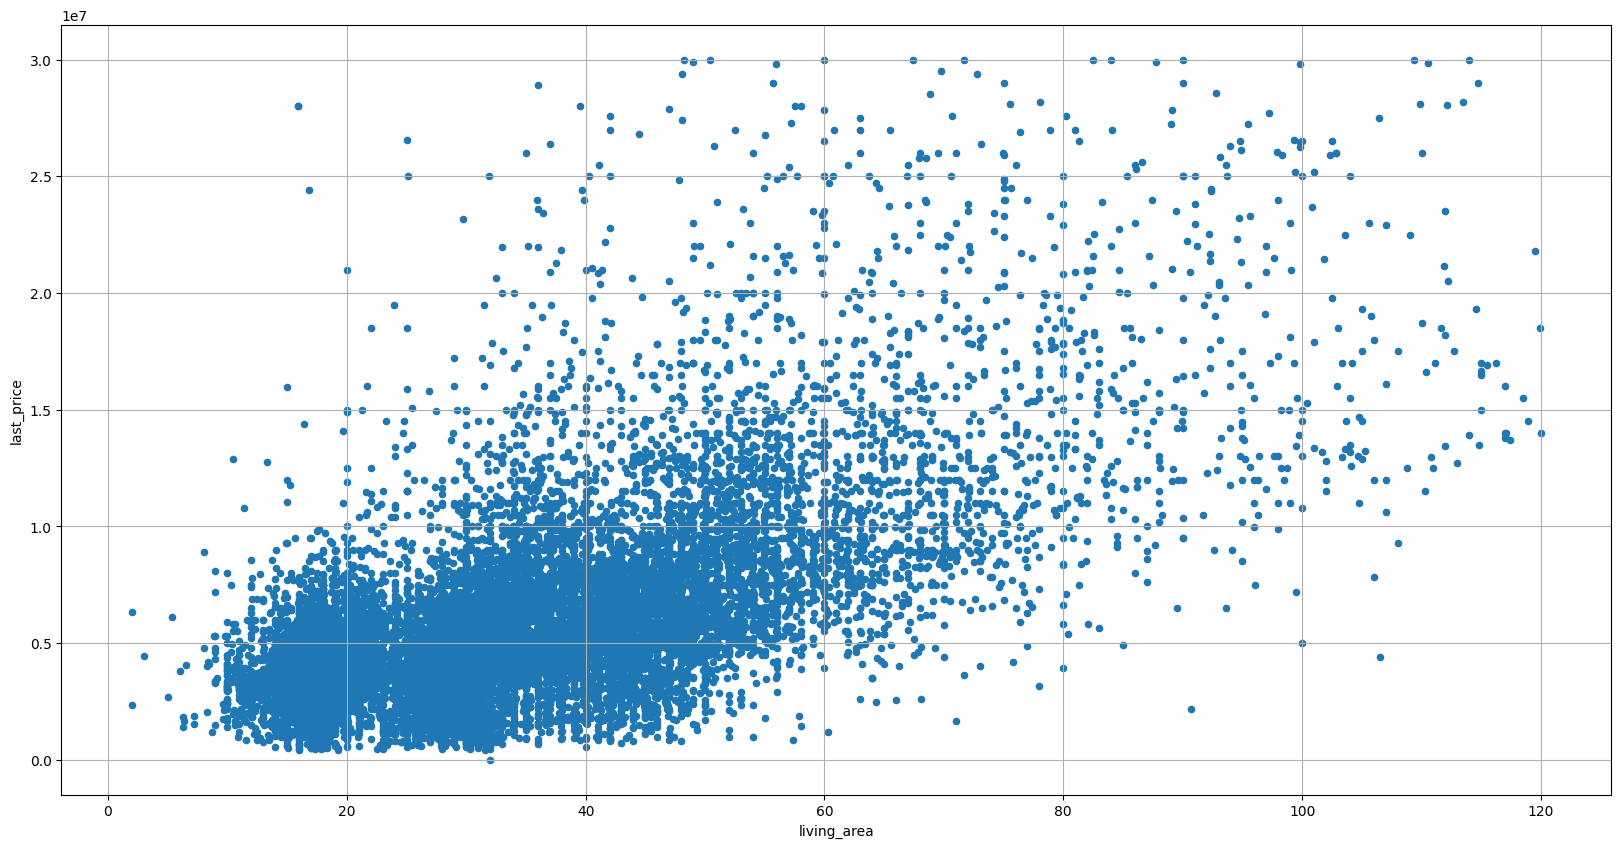

In [96]:
data.plot(kind='scatter',x ='living_area', y='last_price',grid=True,figsize=(20,10));

In [97]:
data['living_area'].corr(data['last_price'])

0.6703253127404555

Для жилой площади картина немного меняется. Коэффициент корреляции 0.1 ниже. 

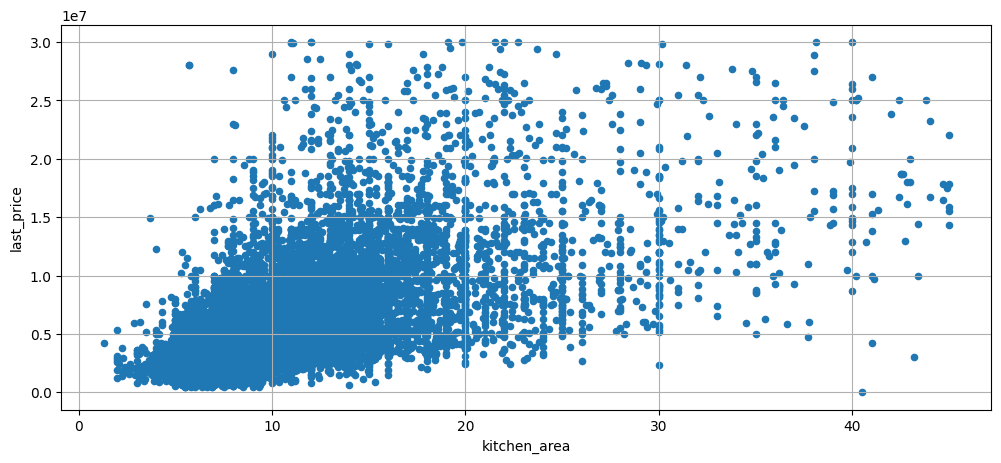

In [98]:
data.plot(kind='scatter',x ='kitchen_area', y='last_price',grid=True,figsize=(12,5));

In [99]:
data['kitchen_area'].corr(data['last_price'])

0.6088153184109852

Для кухни коэфициент еще ниже. Ранее мы отмечали, что кухни для одинаковых по общей площади квартир могут сильно различаться, могут быть совмещены с гостинной и т.д. Поэтому связь между площадью кухни и стоимостью квартиры уже не такая линейная.

##### Количество комнат и тип этажа

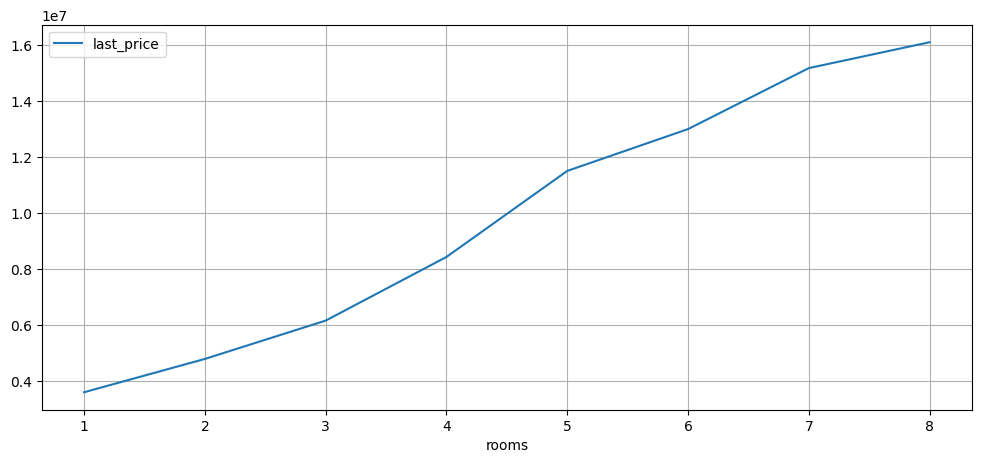

In [100]:
data.pivot_table(index='rooms',values='last_price', aggfunc='median').plot(grid=True,figsize=(12,5));

Чем больше комнат - тем выше стоимость, потому что чем больше комнат, тем больше общая площадь квартир. 

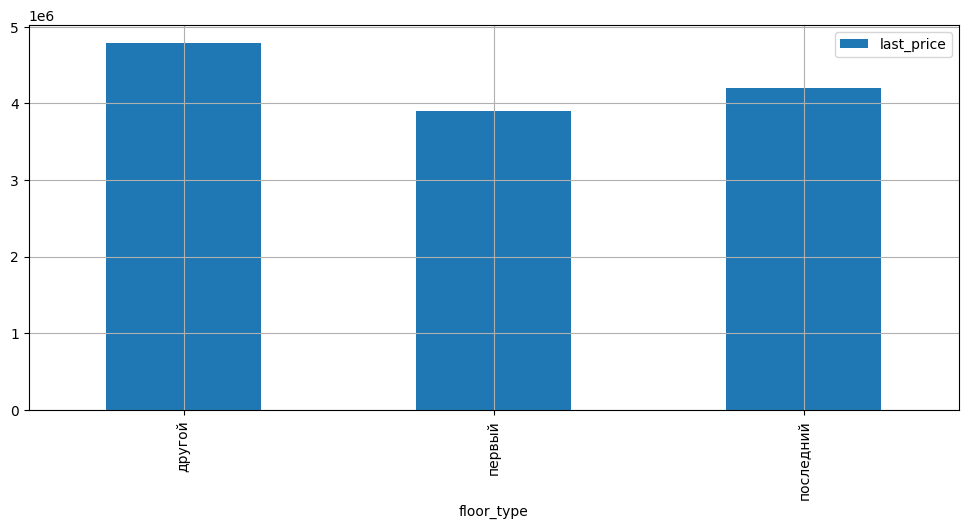

In [101]:
data.pivot_table(index='floor_type',values='last_price', aggfunc='median').plot(kind='bar',grid=True,figsize=(12,5));

Из данной диаграмы можно сделать вывод, что квартиры на первом этаже имеют самую низкую стоимость, так как первый этаж приносит больше не удобств, значит стоимость ниже. Квартиры находящиеся на "других" этажах стоят дороже, чем квартиры на последнем этаже. Последний этаж тоже несет ряд недобств, поэтому такое распределение цены вполне логично.

##### День, месяц и год публикации

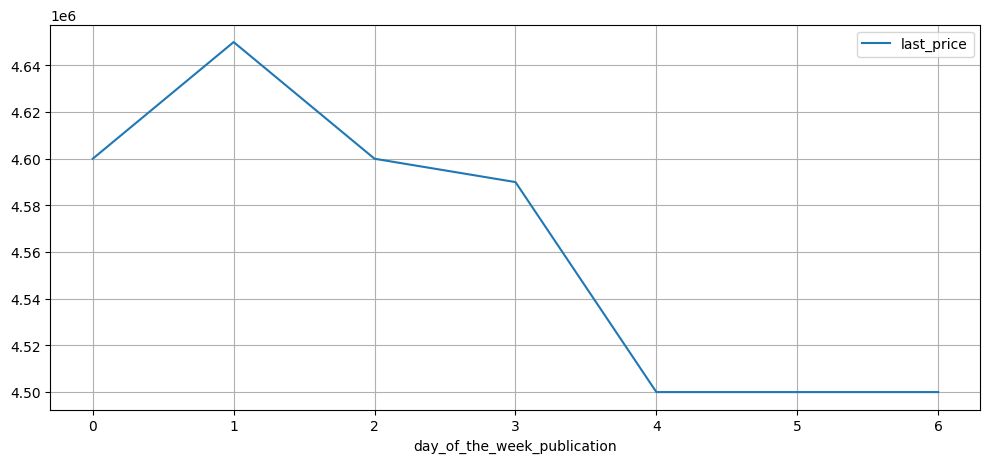

In [102]:
data.pivot_table(index='day_of_the_week_publication',values='last_price', aggfunc='median').plot(grid=True,figsize=(12,5));


Вывод: По данному распределению можно сказать, что во вторник самая высокая цена, далее выходным она падает, а потом начинает расти вновь. 

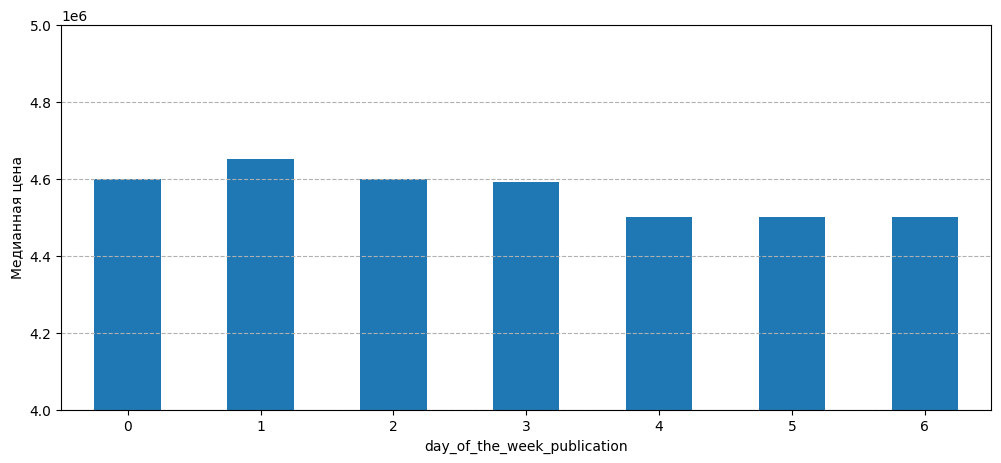

In [103]:
# Код ревьюера
import matplotlib.pyplot as plt

data.pivot_table(index='day_of_the_week_publication',
                 values='last_price', 
                 aggfunc='median').plot(kind='bar',figsize=(12,5),
                                       legend = None, rot = 0, ylabel = 'Медианная цена')
plt.ylim(4000000, 5000000)
plt.grid(axis = 'y', linestyle = '--')
plt.show()

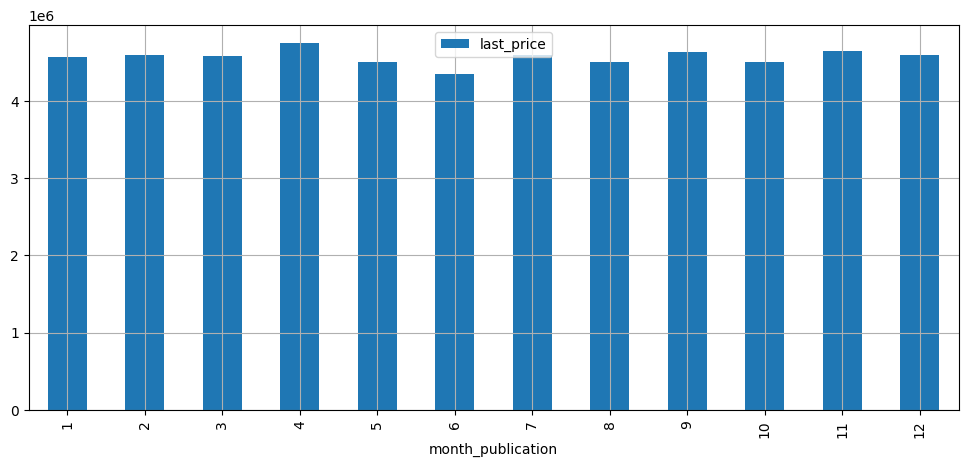

In [104]:
data.pivot_table(index='month_publication',values='last_price', aggfunc='median').plot(kind='bar',grid=True,figsize=(12,5));


По графику видно, что месяц публикации не сильно влияет на стоимость квартиры. Немного ниже стоимость бывает в мае июне и августе. Самые высокие цены апрель и ноябрь.

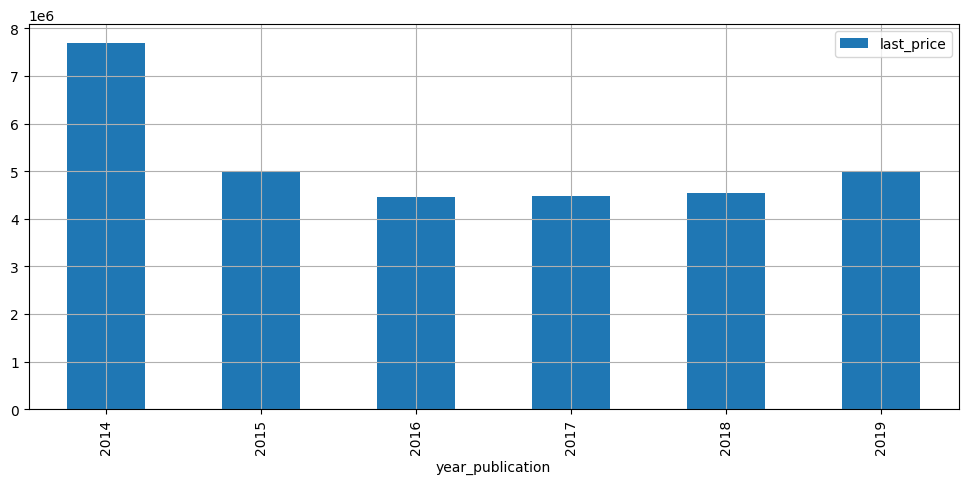

In [105]:
data.pivot_table(index='year_publication',values='last_price', aggfunc='median').plot(kind='bar',grid=True,figsize=(12,5));


По графику видно, что в 2014 году цена была самой высокой, на это мог повлиять кризис (люди покупают недвижимость в целях сохранить деньги). Далее цена начала падать (покупательская способность падает) до 2016 года и потом опять идти вверх (кризис "слегка отпустил" и\или инфляция).

#### Цена одного квадратного метра

In [106]:
#получаем топ 10 городов, с большим количеством объявлений для дальнейшей проверки
data['locality_name'].value_counts(ascending=False).head(10)

Санкт-Петербург      14822
посёлок Мурино         542
посёлок Шушары         433
Всеволожск             388
Пушкин                 349
Колпино                333
посёлок Парголово      321
Гатчина                298
деревня Кудрово        290
Выборг                 226
Name: locality_name, dtype: int64

In [107]:
# получаем сводную таблицу, где для каждого города посчитаны среднее значение стоимости квадратного метра и количесвто объявлений
top_10=data.pivot_table(index='locality_name', values='price_for_meter', aggfunc=['mean','count'])
# переименовываем столбцы
top_10.columns = ['price_for_meter_mean','frequency']
# сортируем, чтобы выделить топ 10 по самым популярным городам
top_10.sort_values(by='frequency',ascending=False ).head(10)

,price_for_meter_mean,frequency
locality_name,,
Санкт-Петербург,110501.19,14822
посёлок Мурино,85822.07,542
посёлок Шушары,78601.21,433
Всеволожск,68761.22,388
Пушкин,102674.06,349
Колпино,75275.84,333
посёлок Парголово,90235.72,321
Гатчина,68920.77,298
деревня Кудрово,92521.24,290


Если сравнить первую таблицу и вторую, города совпадают, значит все сделано правильно.
Самый дорогой квадратный метр в Санкт-Петербурге. Самый дешевый из этого топа в Выборге.

#### Зависимости стоимость объектов от расстояния до центра города

                        Средняя стоимость квартир
cityCenters_nearest_km                           
0.0                                      9.91e+06
1.0                                      1.15e+07
2.0                                      1.05e+07
3.0                                      9.43e+06
4.0                                      1.00e+07
5.0                                      1.04e+07
6.0                                      9.29e+06
7.0                                      9.19e+06
8.0                                      8.60e+06
9.0                                      6.64e+06
10.0                                     6.30e+06
11.0                                     6.00e+06
12.0                                     5.74e+06
13.0                                     6.03e+06
14.0                                     5.59e+06
15.0                                     5.74e+06
16.0                                     5.34e+06
17.0                                     5.19e+06


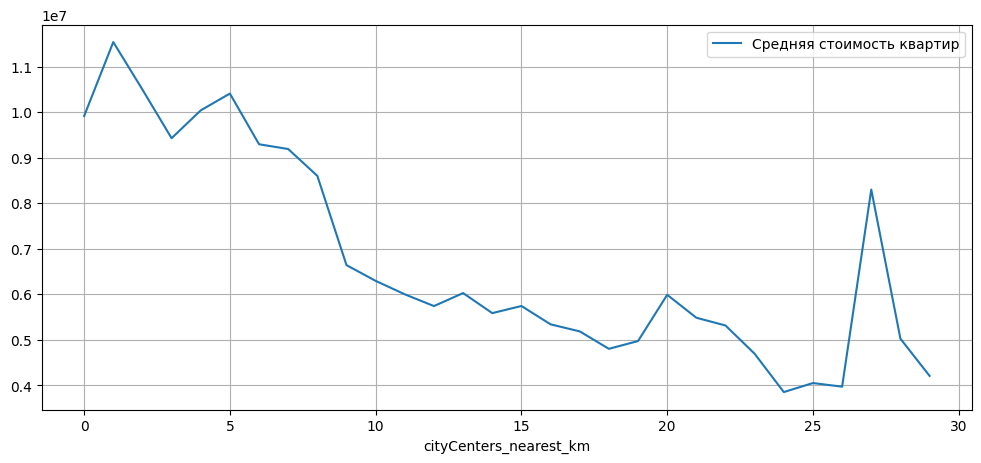

In [108]:
# получаем таблицу по срезу Санкт-Петербурга, расчитывая для каждого километра среднюю стоимость квартиры
Saint_Petersburg_pivot= data.loc[data['locality_name'] == 'Санкт-Петербург'].pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='mean')
# меняем название столбца и выводим таблицу
Saint_Petersburg_pivot.columns=['Средняя стоимость квартир']
print(Saint_Petersburg_pivot)
# строим график зависимости стоимости квартиры от расстояния до центра
Saint_Petersburg_pivot.plot(grid=True,figsize=(12,5));

По графику видно, что чем дальше от центра, тем стоимость ниже. Есть несколько экстремумов на расстоянии 5, 20 и 27 км с подорожанием цен по сравнению с предыдущем километром. На расстоянии 27 км происходит сильно подорожании с 4 миллионов до 8 миллионов. Проверим, сколько всего строк на этом километре. 

In [109]:
data.loc[(data['cityCenters_nearest_km']==27.0) & (data['locality_name']=='Санкт-Петербург')]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,calculator,price_for_meter,day_of_the_week_publication,month_publication,year_publication,floor_type,cityCenters_nearest_km
687,13,1.44e+07,74.0,2017-11-28,2,3.13,5.0,30.0,3,False,...,0.0,NaN,128.0,0.34,193918.92,1,11,2017,другой,27.0
5612,6,2.25e+06,32.0,2018-02-27,1,NaN,2.0,16.5,2,False,...,0.0,NaN,178.0,0.22,70312.50,1,2,2018,последний,27.0


In [110]:
data.loc[(data['cityCenters_nearest_km']==27.0) & (data['locality_name']=='Санкт-Петербург') ]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,calculator,price_for_meter,day_of_the_week_publication,month_publication,year_publication,floor_type,cityCenters_nearest_km
687,13,1.44e+07,74.0,2017-11-28,2,3.13,5.0,30.0,3,False,...,0.0,NaN,128.0,0.34,193918.92,1,11,2017,другой,27.0
5612,6,2.25e+06,32.0,2018-02-27,1,NaN,2.0,16.5,2,False,...,0.0,NaN,178.0,0.22,70312.50,1,2,2018,последний,27.0


На 27 км есть информация только по двум квартирам, стоимость 14,5 миллиона и 2,3 миллиона. Среднее для этих двух чисел конечно же получается очень большим. Поэтому на графике мы наблюдаем этот пик.

### Общий вывод

Мы проанализировали данные из архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.

1) Из-за большого количества пропусков столбцах : высота потолков(30%), количество этажей (1%), названий населенных пунктов(1%), расстояний до центра города (30%), до аэропорта(30%), до парков и водоемов(50%), время сколько "висело" объявление (13%)- в полной мере оценить зависимость цены от этих параметров не удалось. 

2) Нам пришлось заменять пропуски в столбцах жилой площади(8%) и кухни (10%) для установления связи цены от этих параметров. А так же искать ошибки в столбце с название населенных пунктов.
    
3) После удаления аномальных значений из столбцов: высота потолков, цена, площадей квартир, расстояний до центра, аэропорта, парка - датасет уменьшился примерно на 6%.

4) Из анализа объявлений были сделаны следующие выводы:
    
    - Чаще всего продаются квартиры 30,45 и 60 м.кв.;
    - В основном цена располагается в интервале от 2 до 7 миллионов, но есть и более высокие цены (30 и более миллионов);
    - Почти на одном уровне популярности для продажи являются однокомнатные и двухкомнатные квартиры, реже трехкомнатные;
    - Больше всего квартир продается не на первом и не на последних этажах;
    - Количество этажей в доме чаще всего ровняется 5 и 9;
    - Публикаций больше выкладывают в будние дни, особенно в четверг;
    - Популярные месяцы для объявлений : февраль-апрель, октябрь-ноябрь. В "праздничные месяцы": декабрь, январь, май - количество объявлений падает;
    - Быстрой продажей можно назвать промежуток между 1 и 40 днями. Большинсво квартир продается в течении трех месяцев с даты публикации, но есть квартиры, для которых продажа продолжалась до 800 дней (остальные строки с большими значениями мы удалили).
    
    
5) На общую стоимость квартиры имеют влияние множество факторов:
    
    - Чем больше площадь квартиры, тем выше цена;
    - Чем больше комнат, тем выше цена;
    - Квартиры, находящиеся не на первом и не на последних этажах также имеют более высокую цену;
    - В выходные дни цена была ниже, чем в будни. Самая высокая цена была во вторник;
    - В кризисный 2014 год стоимость квартиры имела свою пик, далее цена падала до 2016, потом с ростом инфляции поднималась до 2019 г., но своего пика не достигла.
    
6) По данным из датасета так же удалось найти самую высокую стоимость квадратного метра 110501.19 рублей. Эта цена для квартир в Санкт-Петербурге;
    
7) И так же для Санкт-Петербурга мы выяснили, что чем дальше от центра, тем стоимость ниже. Но из-за пропусков в датасете значений для анализа было немного.
    
Опираясь на эти данные, можно определить рыночную стоимость квартир, учтя все факторы, которые на неё влияют.